In [5]:
import pandas as pd 
import sys
import os

import matplotlib.pyplot as plt
sys.path.append('../')
import utils.helper_signals as helper_signals

import seaborn as sns
from matplotlib.colors import ListedColormap

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [3]:
vehicle_names = ["SEB880", "SEB882", "SEB883", "SEB885", "SEB888", "SEB889"]
vehicle_names = ["SEB880"]

PATH_TO_LOAD = "../Processed_data_new/01_Mf4_Extracted"

dfMf4 = pd.DataFrame()
dfMf4Filled = pd.DataFrame()
#dfMf4Fill = pd.DataFrame()

for vehicle in vehicle_names:
    df = pd.read_csv(os.path.join(PATH_TO_LOAD, vehicle + "_extracted_mf4.csv"), parse_dates=['datetime'])
    df_f = pd.read_csv(os.path.join("../Processed_data_new/02_Mf4_Filled", vehicle + "_filled_mf4.csv"), parse_dates=['datetime'])
    dfMf4 = pd.concat([dfMf4, df])
    dfMf4Filled = pd.concat([dfMf4Filled, df_f])

In [3]:
dfMf4.keys()


Index(['avg_irradiation', 'steering_speed', 'temperature_out', 'hour', 'month',
       'odometer', 'light_sensor_rear', 'light_sensor_front', 'temperature_in',
       'KBI_speed', 'soc', 'ESP_speed', 'latitude', 'longitude',
       'seatbelt_codriver', 'seatbelt_rear_l', 'seatbelt_rear_m',
       'seatbelt_rear_r', 'CHA_ESP_drive_mode', 'CHA_MO_drive_mode',
       'rain_sensor', 'street_category', 'kickdown', 'altitude',
       'driving_program', 'datetime', 'session'],
      dtype='object')

In [4]:
# Calculate the count of missing values in each column
missing_counts = dfMf4.isnull().sum()
# Sort the columns based on the count of missing values in ascending order
dfMf4 = dfMf4[missing_counts.sort_values(ascending=False).index].copy()

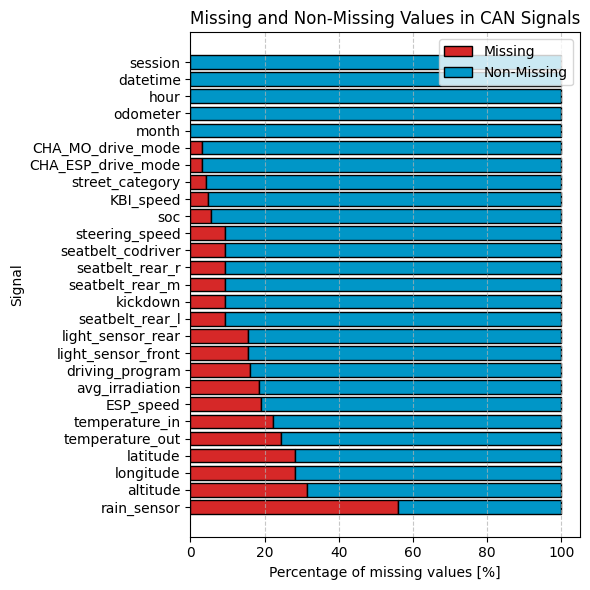

In [4]:

plt.figure(figsize=(6, 6))

# Calculate the count of missing values in each column
missing_counts = dfMf4.isnull().sum()

# Sort the columns based on the count of missing values in ascending order
df = dfMf4[missing_counts.sort_values(ascending=False).index].copy()

colors = ['#d62828', '#0096c7']

for i, context in enumerate(df.keys()):
    
    df_context = df[context]

    missing_values_count = df_context.isnull().sum() / len(df_context) *100
    non_missing_values_count = df_context.notnull().sum() / len(df_context) *100

    if i == 0:
        # Create a horizontal stacked bar chart
        p1 = plt.barh(context, missing_values_count, color=colors[0], edgecolor='black', label='Missing')
        p2 = plt.barh(context, non_missing_values_count, left=missing_values_count, color=colors[1], edgecolor='black', label='Non-Missing')
    else:
        # Create a horizontal stacked bar chart
        p1 = plt.barh(context, missing_values_count, color=colors[0], edgecolor='black')
        p2 = plt.barh(context, non_missing_values_count, left=missing_values_count, color=colors[1], edgecolor='black')


# Customize the plot
plt.title('Missing and Non-Missing Values in CAN Signals')
plt.xlabel('Percentage of missing values [%]')
plt.ylabel('Signal')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



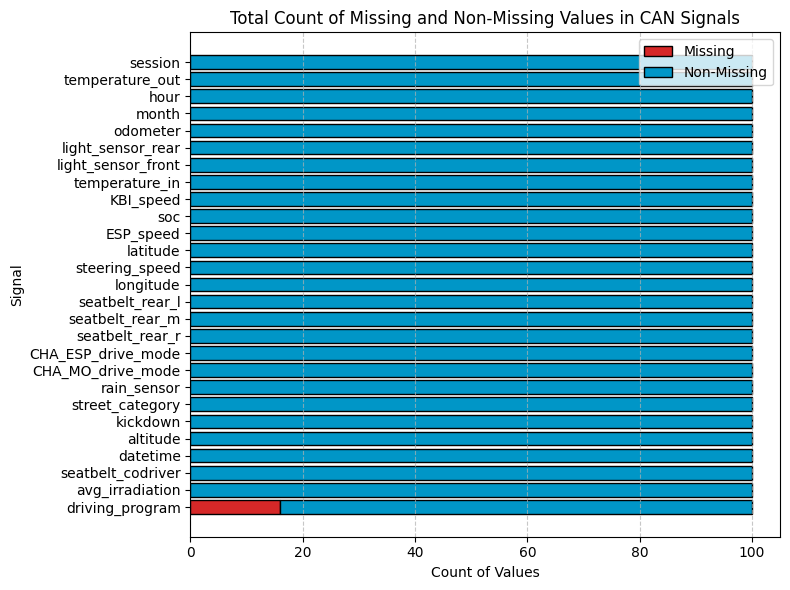

In [5]:
plt.figure(figsize=(8, 6))

# Calculate the count of missing values in each column
missing_counts = dfMf4Filled.isnull().sum()

# Sort the columns based on the count of missing values in ascending order
df = dfMf4Filled[missing_counts.sort_values(ascending=False).index].copy()

colors = ['#d62828', '#0096c7']

for i, context in enumerate(df.keys()):
    
    df_context = df[context]

    missing_values_count = df_context.isnull().sum() / len(df_context) *100
    non_missing_values_count = df_context.notnull().sum() / len(df_context) *100

    if i == 0:
        # Create a horizontal stacked bar chart
        p1 = plt.barh(context, missing_values_count, color=colors[0], edgecolor='black', label='Missing')
        p2 = plt.barh(context, non_missing_values_count, left=missing_values_count, color=colors[1], edgecolor='black', label='Non-Missing')
    else:
        # Create a horizontal stacked bar chart
        p1 = plt.barh(context, missing_values_count, color=colors[0], edgecolor='black')
        p2 = plt.barh(context, non_missing_values_count, left=missing_values_count, color=colors[1], edgecolor='black')


# Customize the plot
plt.title('Total Count of Missing and Non-Missing Values in CAN Signals')
plt.xlabel('Count of Values')
plt.ylabel('Signal')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
# Variables that contain nan values 
context_to_fill = [
       'break_pedal1', 
       'light_sensor1', 
       'light_sensor2',
       'rain_sensor', 
       'speed', 
       'drive_mode', 
       'seatbelt_driver',
       'seatbelt_codriver', 
       'street_category', 
       'latitude', 
       'longitude',
       'temperature', 
       'soc',
       'altitude', 
       'velocity', 
       'sun_intensity',
       'charisma_drive_mode'
]

<Figure size 800x600 with 0 Axes>

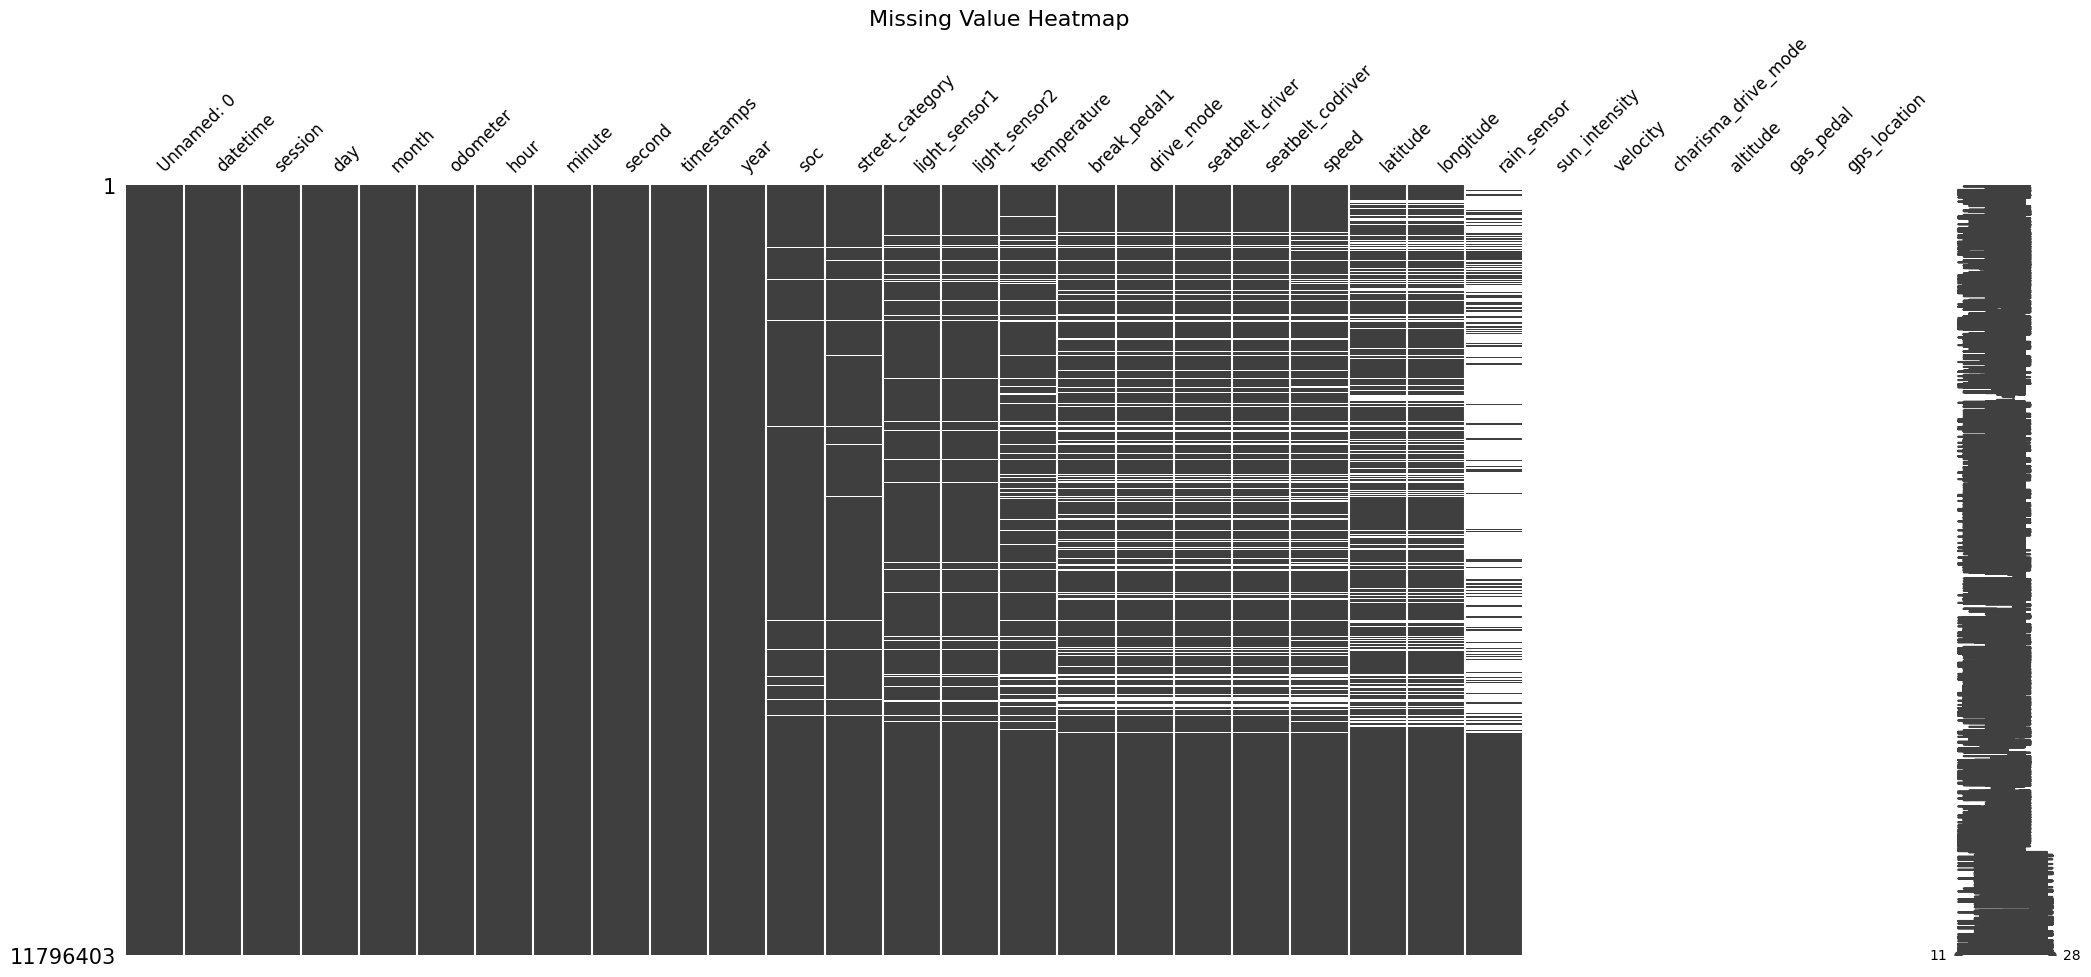

In [8]:
import missingno as msno

# Assuming you have a DataFrame called 'df'
# For demonstration purposes, let's create an example DataFrame:
# data = {
#     'Column1': [1, 2, None, 4, None],
#     'Column2': [None, 6, None, 8, 9],
#     'Column3': [11, 12, 13, None, None],
#     'Column4': [None, None, None, None, None],
#     'Column5': [21, 22, 23, 24, 25]
# }
df = dfMf4

# Create the Missing Value Heatmap
plt.figure(figsize=(8, 6))
msno.matrix(df, fontsize=12, sparkline=True)
plt.title('Missing Value Heatmap', fontsize=16)
plt.show()

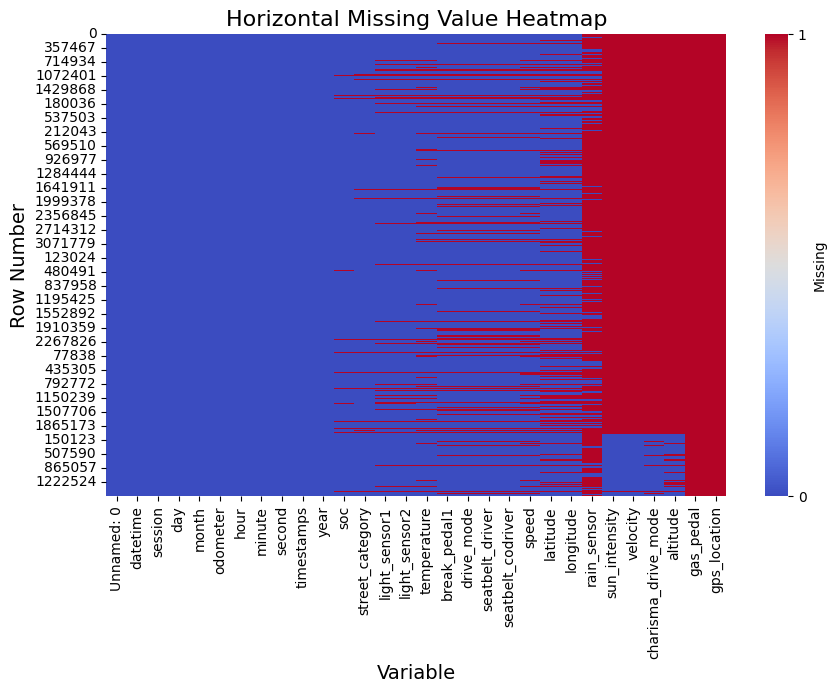

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df'
# For demonstration purposes, let's create an example DataFrame:

df = dfMf4

# Create the Missing Value Heatmap with horizontal orientation and better color palette
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='coolwarm', cbar_kws={'ticks': [0, 1], 'label': 'Missing'})
plt.title('Horizontal Missing Value Heatmap', fontsize=16)

plt.xlabel('Variable', fontsize=14)
plt.ylabel('Row Number', fontsize=14)

plt.show()


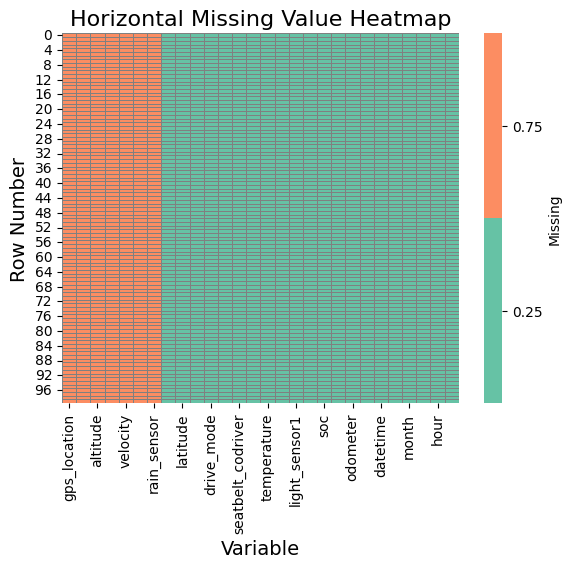

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


df = dfMf4.iloc[:100,:]

cmap = ListedColormap(['#66c2a5', '#fc8d62'])


sns.heatmap(df.isnull(), cmap=cmap, cbar_kws={'ticks': [0.25, 0.75], 'label': 'Missing'}, linecolor='gray', linewidths=0.5)
plt.title('Horizontal Missing Value Heatmap', fontsize=16)

plt.xlabel('Variable', fontsize=14)
plt.ylabel('Row Number', fontsize=14)

plt.show()


START
HEATMAP
ADJUST X-AXIS
LEGEND CUSTOM
LINE
SAVE PDF
PLT SHOW


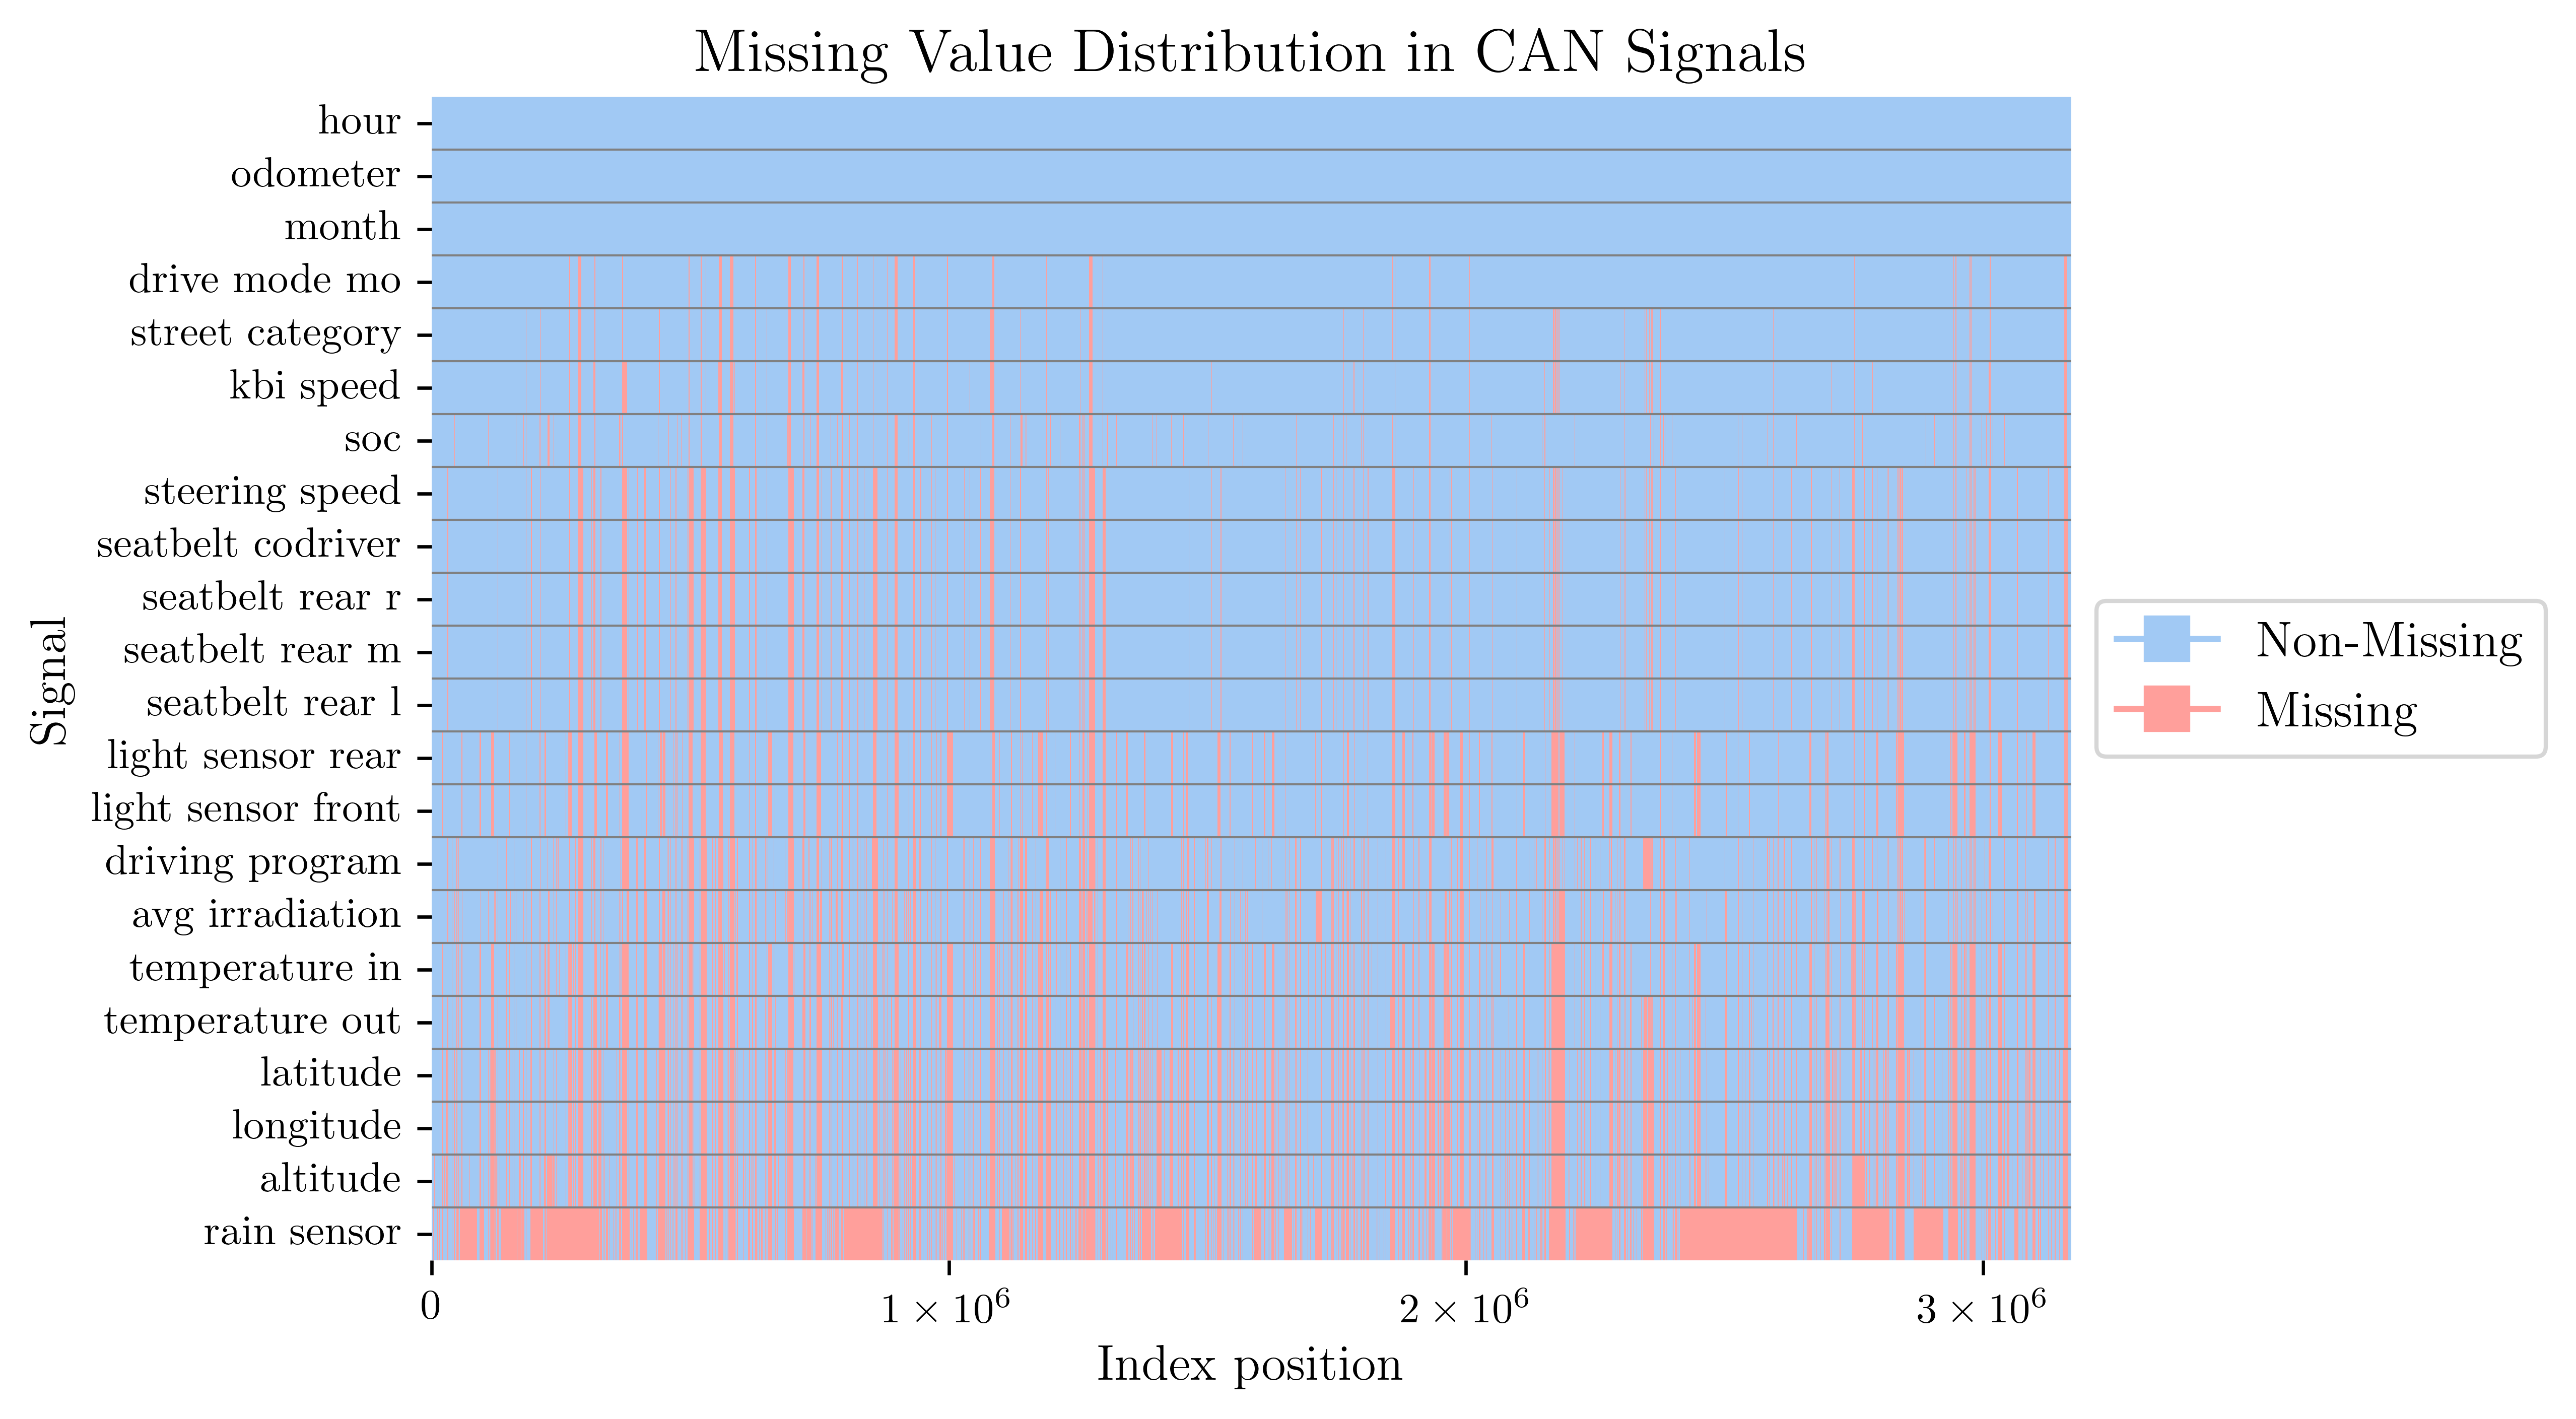

In [17]:
import numpy as np
print("START")
df = dfMf4.copy()#[:1000100]
cols_drop = ["session", "ESP_speed","CHA_ESP_drive_mode", 'kickdown', 'datetime']
df = df.drop(columns=cols_drop)

new_column_names = {
    'KBI_speed': 'kbi_speed',
    'CHA_MO_drive_mode': 'drive_mode_mo',
}

df = df.rename(columns=new_column_names)

# Create a binary color palette for missing and non-missing values
#cmap = ListedColormap(['#0096c7', '#d62828'])

cmap = sns.color_palette("pastel")[0], sns.color_palette("pastel")[3]
cmap = ListedColormap(cmap)

# Create the Missing Value Heatmap with horizontal orientation, binary color palette, and grid
plt.figure(figsize=(7, 5), dpi=600)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12,  # Adjust the font size for all elements
    "axes.labelsize": 12,  # Font size of axis labels
    "xtick.labelsize": 10,  # Font size of x-axis tick labels
    "ytick.labelsize": 10,  # Font size of y-axis tick labels
    "legend.fontsize": 12,  # Font size of legend
    "figure.titlesize": 16,  # Font size of figure title
})

print("HEATMAP")
ax = sns.heatmap(df.isnull().T, cmap=cmap, cbar=False)
ax.invert_yaxis()

# Modify y-axis tick labels to replace underscores with spaces
y_tick_labels = [label.replace('_', ' ') for label in df.keys()]
ax.set_yticklabels(y_tick_labels, rotation=0)
print("ADJUST X-AXIS")
# Set x-axis ticks and labels every i * 10^4
max_index = df.index.max()
tick_positions = [i * 10 ** 6 for i in range((max_index +1) // 10 ** 6 + 1)]
tick_labels = [str(0)]
tick_labels += [f"${i} \\times 10^6$" for i in range(1,len(tick_positions))]
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=0)

print("LEGEND CUSTOM")
# Create a custom legend for "Missing" and "Non-Missing"
legend_labels = ['Non-Missing', 'Missing']
colors = [cmap(0), cmap(1)]
legend_elements = [plt.Line2D([0], [0], marker='s', color=color, label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, colors)]
# Add the legend to the plot
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

# Add horizontal lines to separate the signals
print("LINE")
for i in range(1, len(df.columns)):
    ax.hlines(i, 0, len(df), colors='gray', linewidth=0.5)

plt.title('Missing Value Distribution in CAN Signals')
# Distribution of Missing Values in CAN Signals

plt.ylabel('Signal')
plt.xlabel('Index position')
#plt.legend()
print("SAVE PDF")
#plt.savefig("/Users/wannerje/Dropbox/Porsche/eth_report/Img/nan_dist.pdf", format="pdf", bbox_inches="tight")
plt.savefig("/Users/wannerje/Dropbox/Porsche/eth_report/Img/nan_dist.png", format="png", bbox_inches="tight")

print("PLT SHOW")
plt.show()


In [28]:
print(f"${2} \\times 10^4$")

$2 \times 10^4$


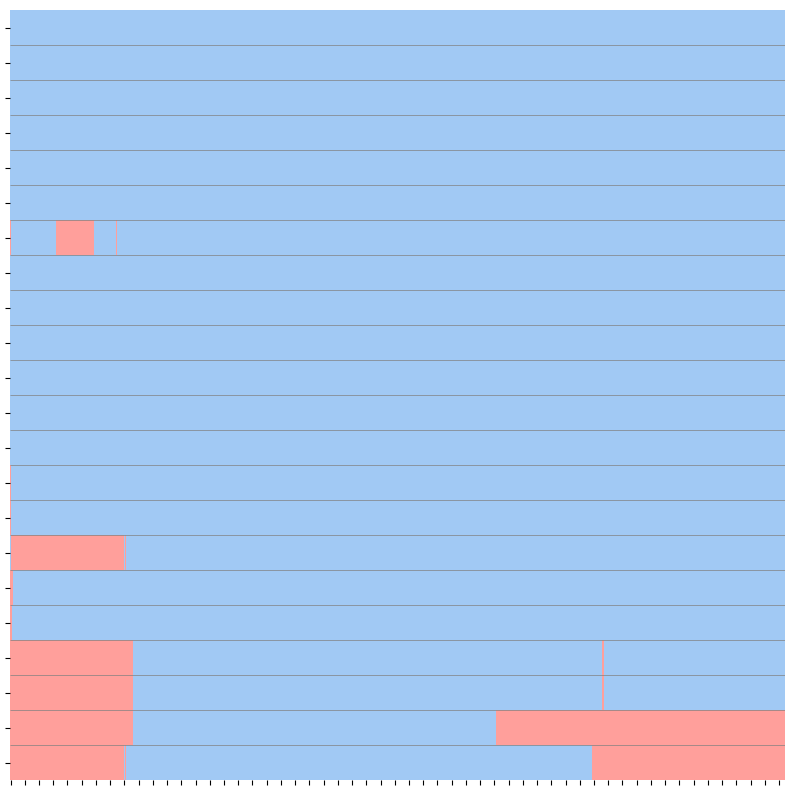

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



# Define the start and stop indices
start, stop = 290000, 300000

# Copy the relevant portion of the DataFrame
#df = dfMf4.copy()[start:stop]

df = dfMf4.copy()[dfMf4.session == 12]
"""
0: continupously missing 
1000, 1300: partially missing, 
2000: singel sensors broken
"""

# Columns to drop from the DataFrame
cols_drop = ["session", "ESP_speed", "CHA_ESP_drive_mode", 'kickdown', 'datetime']
df = df.drop(columns=cols_drop)

# Create a binary color palette for missing and non-missing values
cmap = ListedColormap(sns.color_palette("pastel")[0:4:3])

# Create the Missing Value Heatmap with horizontal orientation, binary color palette, and grid
plt.figure(figsize=(10, 10))
ax = sns.heatmap(df.isnull().T, cmap=cmap, cbar=False)
ax.invert_yaxis()

# Calculate relative row indices
row_indices = df.index - start

# Create a custom legend for "Missing" and "Non-Missing"
legend_labels = ['Non-Missing', 'Missing']
legend_elements = [plt.Line2D([0], [0], marker='s', color=color, label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, cmap.colors)]
#ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

# Add horizontal lines to separate the signals
for i in range(1, len(df.columns)):
    ax.hlines(i, 0, len(df), colors='gray', linewidth=0.5)

#plt.title('Distribution of Missing Values in CAN Signals', fontsize=25)
# plt.ylabel('Signal', fontsize=14)
# plt.xlabel('Row index', fontsize=14)


# # Set custom x-axis tick labels
# ax.set_xticks(range(len(row_indices)))
# ax.set_xticklabels(row_indices)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()


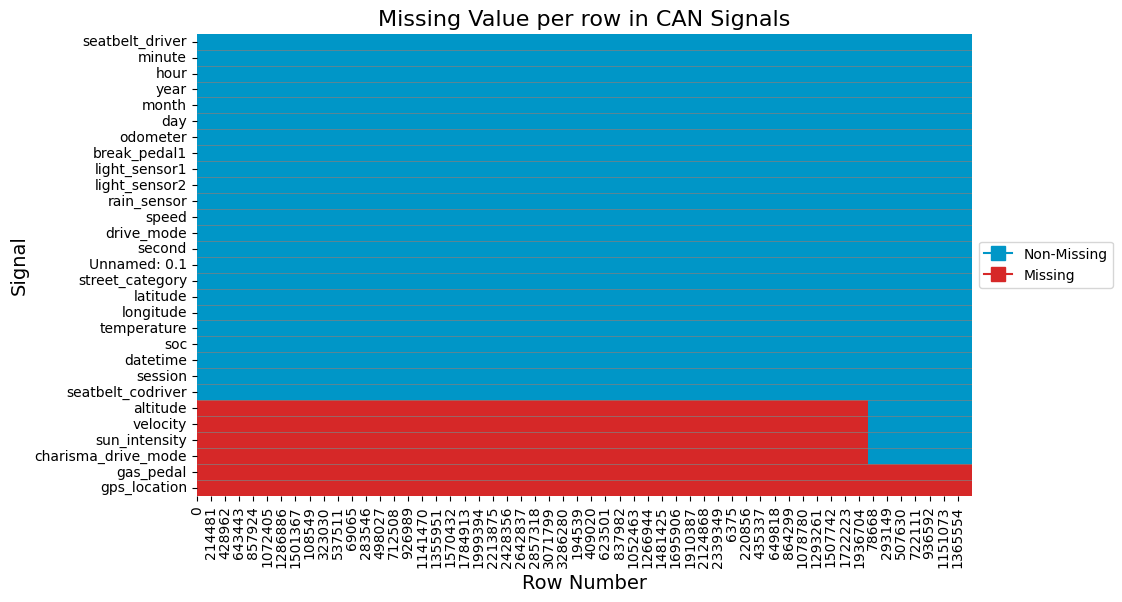

In [200]:
df = dfMf4Fill.copy()

# Create a binary color palette for missing and non-missing values
cmap = ListedColormap(['#0096c7', '#d62828'])

# Create the Missing Value Heatmap with horizontal orientation, binary color palette, and grid
plt.figure(figsize=(10, 6))


ax = sns.heatmap(df.isnull().T, cmap=cmap, cbar=False)
ax.invert_yaxis()
# Create a custom legend for "Missing" and "Non-Missing"
legend_labels = ['Non-Missing', 'Missing']
colors = [cmap(0), cmap(1)]
legend_elements = [plt.Line2D([0], [0], marker='s', color=color, label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, colors)]
# Add the legend to the plot
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

# Add horizontal lines to separate the signals
for i in range(1, len(df.columns)):
    ax.hlines(i, 0, len(df), colors='gray', linewidth=0.5)

plt.title('Missing Value per row in CAN Signals', fontsize=16)

plt.ylabel('Signal', fontsize=14)
plt.xlabel('Row Number', fontsize=14)
#plt.legend()

plt.show()

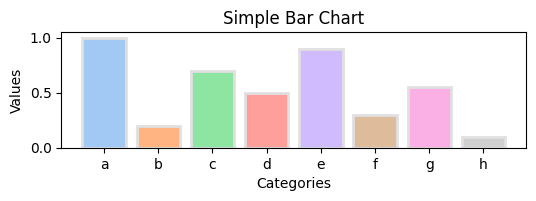

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

# Sample data
categories = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
values = [1, 0.2, 0.7, 0.5, 0.9, 0.3, 0.55, 0.1]

# Set Seaborn color palette
palette = sns.color_palette("pastel")
num_colors = len(categories)
colors = palette[:num_colors]

plt.figure(figsize=(6, 1.5))

# Create a bar chart
plt.bar(categories, values, color=colors, edgecolor='#e0e0e0', linewidth=2)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Simple Bar Chart')

# Display the chart
plt.show()

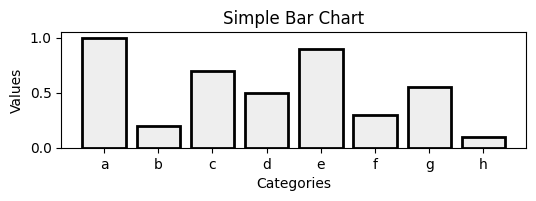

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

# Sample data
categories = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
values = [1, 0.2, 0.7, 0.5, 0.9, 0.3, 0.55, 0.1]

# Set Seaborn color palette
# palette = sns.color_palette("pastel")
# num_colors = len(categories)
# colors = palette[:num_colors]

plt.figure(figsize=(6, 1.5))

# Create a bar chart
plt.bar(categories, values, color='#06d6a0', edgecolor='#e0e0e0', linewidth=2)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Simple Bar Chart')

# Display the chart
plt.show()